In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target 

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 랜덤성을 부여하지 않고 잘라낸 경우

- Suffle을 수행하지 않음

In [4]:
test_size = 50

# X와 y는 항상 동일한 사이즈로 만들어야 한다
X_test = X[: test_size]
y_test = y[: test_size] 

# test 데이터로 0번만 사용하겠다
print(y_test)

# 해당 코드는 데이터셋의 처음 50개의 데이터 포인트를 테스트 세트로 할당하는 과정입니다. 이는 train_test_split 함수를 사용하지 않고 수동으로 데이터셋을 분할하는 방법 중 하나입니다.

# 좀 더 구체적으로 설명드리자면:
# test_size = 50: 테스트 세트의 크기를 50으로 설정합니다.
# X_test = X[:test_size]: 특징 행렬 X의 처음 50개의 행을 X_test로 할당합니다.
# y_test = y[:test_size]: 타겟 벡터 y의 처음 50개의 값을 y_test로 할당합니다.
# 이렇게 하면 X_test와 y_test는 처음 50개의 데이터 포인트를 포함하게 됩니다.

# 이 방법은 특정 크기의 테스트 세트를 지정하여 데이터를 수동으로 분할할 때 유용합니다. 
# 그러나 일반적으로는 train_test_split 함수를 사용하여 무작위로 데이터를 섞고 나누는 것이 더 좋습니다. 데이터의 분포를 고려하고, 모델의 성능을 일반화할 수 있기 때문입니다.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
X_train = X[test_size : ]
y_train = y[test_size : ]

print(y_train)

# X_train = X[test_size :]: 특징 행렬 X의 51번째 데이터 포인트부터 끝까지를 X_train으로 할당합니다.
# y_train = y[test_size :]: 타겟 벡터 y의 51번째 데이터 포인트부터 끝까지를 y_train으로 할당합니다.

# 즉, 처음 50개의 데이터 포인트는 테스트 세트로, 나머지 데이터 포인트는 학습 세트로 할당됩니다.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 모델 훈련하는 코드
# 평가하기 위한 Accuracy_score

dt_clf = DecisionTreeClassifier() # 모델 객체 만들고

dt_clf.fit(X_train, y_train) # 훈련하고 (훈련은 0번 class로 하고)

pred = dt_clf.predict(X_test) # 예측하고 (예측은 1,2번class로 하니)

acc_result = accuracy_score(y_test, pred) # 평가 (평가 점수는 0점): 따라서 데이터를 랜덤하게 섞어준 후 테스트 데이터와 트레이닝 데이터를 만들어야 한다.

print("예측 스코어 : {:.4f}".format(acc_result))

# 예측 스코어가 0이 나오는 이유는 학습 데이터와 테스트 데이터가 서로 다른 분포를 가지고 있어서 모델이 학습한 내용을 테스트 데이터에 제대로 적용할 수 없기 때문일 가능성이 큽니다. 
# 특히, 데이터의 분포가 타겟 클래스별로 고르게 분포되지 않았을 가능성이 높습니다.

# 아이리스 데이터셋의 타겟 클래스는 0, 1, 2 세 가지 종류로 나뉘어 있으며, 데이터셋이 순차적으로 정렬되어 있을 경우 처음 50개의 데이터 포인트는 모두 동일한 클래스일 가능성이 높습니다.
# 이는 모델이 특정 클래스에 대해서만 학습하게 되고, 다른 클래스에 대한 예측을 전혀 할 수 없게 만듭니다.

# 나은 방법은 train_test_split 함수를 사용하여 데이터를 무작위로 섞고 학습 및 테스트 세트로 나누는 것입니다. 이렇게 하면 데이터의 분포가 더 고르게 분할됩니다.
# train_test_split 함수는 데이터를 무작위로 섞어서 분할하기 때문에 학습 데이터와 테스트 데이터의 분포가 더 균일해집니다.

# 훈련 : dl_clf.fit(X_train, y_train)
# 시험 : pred = dl_clf.predict(X_test) = 정답 마킹
# 시험 점수 결과 확인 : acc_result = accuracy_score(y_test, pred)

예측 스코어 : 0.0000


# train_test_split 활용하기

In [7]:
from sklearn.model_selection import train_test_split

# 데이터를 무작위로 섞어서 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, # 특징 행렬
    y, # 타겟 벡터
    test_size=0.3, # 테스트 세트 비율 (30%)
    random_state=121 # 랜덤 시드
)


# 이 코드는 train_test_split 함수를 사용하여 아이리스 데이터셋을 학습 세트와 테스트 세트로 분할합니다. 


# X_train, X_test, y_train, y_test = train_test_split(...):
# train_test_split 함수를 사용하여 특징 행렬 X와 타겟 벡터 y를 학습 세트(X_train, y_train)와 테스트 세트(X_test, y_test)로 분할합니다.

# X, y:
# X는 특징 행렬(데이터 포인트의 입력 값)입니다.
# y는 타겟 벡터(데이터 포인트의 출력 값 또는 라벨)입니다.

# test_size = 0.3:
# 테스트 세트의 비율을 전체 데이터의 30%로 설정합니다. 즉, 데이터의 30%는 테스트용으로, 나머지 70%는 학습용으로 사용됩니다.

# random_state = 121:
# 랜덤 시드를 121로 설정하여 데이터를 무작위로 섞은 후 분할합니다. 동일한 랜덤 시드를 사용하면, 같은 분할 결과를 얻을 수 있어 결과의 재현성을 보장합니다.
# random_state에 설정된 121은 난수 생성기의 초기값을 설정하기 위한 숫자일 뿐 특별한 의미는 없습니다. 


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤하게 잘랐기 때문에 y_train이 잘 분포해있는지 확인하기 위한 시각화

sns.set_theme()

# sns.set_theme():
# seaborn의 테마를 설정하여 그래프의 스타일을 지정합니다. 기본 테마는 깔끔한 스타일을 제공하며, 추가적인 설정 없이도 보기 좋은 그래프를 그릴 수 있습니다.

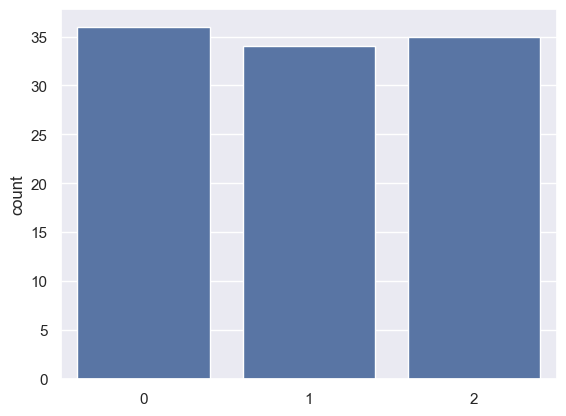

In [9]:
sns.countplot(x = y_train)
plt.show()

# sns.countplot(x=y_train):
# countplot 함수는 주어진 데이터의 각 고유 값의 개수를 세고, 이를 막대 그래프로 표시합니다. y_train의 각 클래스가 학습 세트에 얼마나 많이 있는지를 시각화합니다.

## stratify 옵션 활용하기

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, #feature
    y, #target
    test_size = 0.3,
    random_state = 121,
    stratify=y 
)

# stratify: 정수,문자열 데이터만(카테고리 형식의 데이터만) 지정이 가능. 데이터의 절대적인 비율을 확인해줌. 
# stratify=y: 타겟 벡터 y를 기준으로 계층화 분할을 수행하여 각 클래스의 비율이 원본 데이터와 동일하게 유지되도록 합니다.

<function matplotlib.pyplot.show(close=None, block=None)>

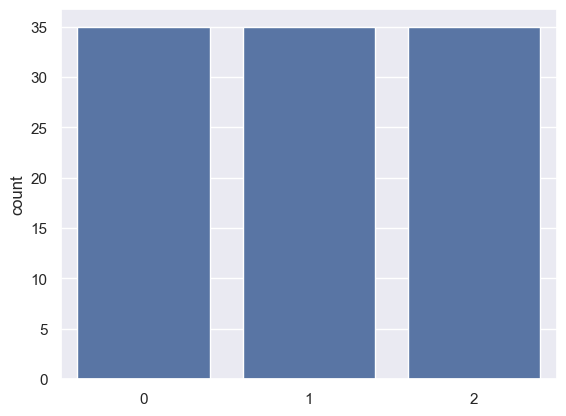

In [11]:
sns.countplot(x = y_train)
plt.show

# K-Fold, Stratified K-Fold

In [12]:
# K-Fold
from sklearn.model_selection import KFold
import numpy as np

In [13]:
# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3)

# n_splits=3은 데이터를 3개의 폴드로 나누겠다는 의미입니다.

# KFold 객체의 split() 함수를 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 array로 반환
for train_indices, valid_indices in kfold.split(X):
    print("검증 세트의 인덱스 : {}".format(valid_indices))
    print("훈련 세트의 인덱스 : {}".format(train_indices))
    print("\n\n")

# kfold.split(X):
# X 데이터셋을 3개의 폴드로 분할합니다. 각 분할마다 학습 세트와 검증 세트의 인덱스를 생성합니다



검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
훈련 세트의 인덱스 : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]



검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
훈련 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 10

# 교차 검증 수행
- 각 폴드 마다의 훈련 세트를 위한 인덱스를 활용해 훈련 데이터로 사용
- 검증 세트를 위한 인덱스를 활용해 검증 데이터로 사용
- 각 훈련, 검증의 결과를 저장했다가, 최종적으로 훈련이 끝나면 평균

In [31]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

# n_iter: 폴드 번호를 저장하는 변수입니다.
# cv_accuracy: 각 폴드의 정확도를 저장하는 리스트입니다.


kfold = KFold(n_splits=3)

# 데이터를 3개의 폴드로 나누는 KFold 객체를 생성합니다.

for train_indices, valid_indices in kfold.split(X):

# kfold.split(X)를 사용하여 데이터셋을 3개의 폴드로 나눕니다.
# 각 반복에서 학습 세트와 검증 세트의 인덱스를 가져옵니다.
    
    # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
    X_train, X_valid = X[train_indices], X[valid_indices]
    y_train, y_valid = y[train_indices], y[valid_indices]
    # 인덱스를 사용하여 학습 세트와 검증 세트를 나눕니다.

    # 모델 생성 및 훈련
    dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련
    #학습 세트를 사용하여 결정 트리 모델을 학습시킵니다.

    # 예측
    pred = dt_clf.predict(X_valid)
    # 평가
    acc = accuracy_score(y_valid, pred)
    # # 검증 세트에 대해 예측을 수행하고, 정확도를 계산합니다.

    # 해당 폴드의 평가 결과를 배열에 저장
    cv_accuracy.append(acc)
    # 검증 세트에 대해 예측을 수행하고, 정확도를 계산합니다.

    n_iter += 1
    print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))
    # 폴드별 정확도를 리스트에 저장했으니, 폴드 번호를 증가시킵니다.
    # 각 폴드의 정확도를 출력합니다.

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))


# 모든 폴드에 대한 정확도가 0.0000으로 나오는 이유는 데이터셋이 타겟 레이블별로 정렬되어 있기 때문입니다. 
# 아이리스 데이터셋은 타겟 레이블별로 정렬되어 있어, KFold를 사용하여 분할할 때, 각 폴드가 특정 클래스의 데이터만 포함하게 됩니다. 
# 이는 모델이 각 폴드에서 모든 클래스에 대해 학습하지 못하게 하여, 검증 세트에서 올바른 예측을 할 수 없게 만듭니다.

# 아이리스 데이터셋의 타겟 레이블이 어떻게 분포되어 있는지 확인해보면 더 이해가 쉬울 것입니다. 
# 아이리스 데이터셋의 타겟 레이블은 0, 1, 2 세 가지로, 각 클래스가 50개씩 정렬되어 있습니다.

# 해결 방법:
# 이를 해결하기 위해 StratifiedKFold를 사용해야 합니다. 
# StratifiedKFold는 각 폴드가 원본 데이터셋의 클래스 비율을 유지하도록 분할합니다. 
# 이를 통해 각 폴드가 모든 클래스를 포함하게 되어, 모델이 모든 클래스를 학습할 수 있게 됩니다.

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [15]:
# Stratified K Fold
from sklearn.model_selection import StratifiedKFold
# StratifiedKFold는 데이터를 폴드로 나눌 때 각 폴드가 동일한 클래스 비율을 가지도록 해주는 교차 검증 기법입니다.

skfold = StratifiedKFold(n_splits=3)
# StratifiedKFold 객체를 생성합니다. n_splits=3은 데이터를 3개의 폴드로 나누겠다는 의미입니다. 각 폴드가 동일한 클래스 비율을 가지게 됩니다.

for train_indices, valid_indices in skfold.split(X, y):
    print("검증 세트의 인덱스 : {}".format(valid_indices))
    print()

    class_, counts = np.unique(y[valid_indices], return_counts=True)
    classes = dict(zip(class_, counts))
    print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
    print("="*50)
    print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



In [16]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):

    # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
    X_train, X_valid = X[train_indices], X[valid_indices]
    y_train, y_valid = y[train_indices], y[valid_indices]

    # 모델 생성 및 훈련
    dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

    # 예측
    pred = dt_clf.predict(X_valid)

    # 평가
    acc = accuracy_score(y_valid, pred)

    # 해당 폴드의 평가 결과를 배열에 저장
    cv_accuracy.append(acc)

    n_iter += 1
    print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9200
3 번째 폴드에 대한 평가 결과 : 0.9800

최종 결과 : 0.96


- 회귀 모델의 경우 : KFold 사용해서 교차검증
- 분류 모델의 경우 : Stratified K Fold를 사용해서 교차검증

# cross_val_score

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), # Classifier가 들어가면 자동으로 Stratifed KFold를 사용.
    X,
    y,
    scoring='accuracy', # 성능 측정 방식. 여기서는 정확도를 사용
    cv=3 # 폴드의 개수
)

print("폴드 별 정확도 확인 : {}".format(scores))
print("평균 정확도 확인 : {}".format(np.mean(scores)))

폴드 별 정확도 확인 : [0.98 0.92 0.98]
평균 정확도 확인 : 0.96


# GridSearch CV

In [18]:
# 하이퍼 파라미터 튜닝에서는 다양한 하이퍼 파라미터 조합을 통해 최적의 조합을 찾는 것이 목표입니다. 이 과정에서 각 조합은 독립적인 모델을 생성하고 평가됩니다.

# 모델에 사용할 하이퍼 파라미터 딕셔너리
parameters = {
    "max_depth": [1, 2, 3],
    "min_samples_split": [2, 3]
}

In [19]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    return_train_score = True,
    cv = 3, #각 하이퍼 파라미터의 조합으로 만드는 모델에서 사용할 폴드의 개수 (총 18개)
    n_jobs = -1 # 사용 가능한 CPU 코어 갯수 지정: -1이면 모든 CPU 사용
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=121
)

In [21]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [22]:
# GridSearch 결과는 cv_results_ 변수에 들어있다.

import pandas as pd

pd.DataFrame(grid_dt_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000393,0.000051,0.000158,0.000024,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
1,0.000318,0.000013,0.000123,0.000002,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
2,0.000320,0.000012,0.000117,0.000005,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
3,0.000256,0.000064,0.000105,0.000025,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
4,0.000899,0.000793,0.000185,0.000083,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785
5,0.000216,0.000053,0.000084,0.000012,3,3,"{'max_depth': 3, 'min_samples_split': 3}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785


In [23]:
print("GridSearchCV 최적 하이퍼 파라미터 : {}".format(grid_dt_clf.best_params_))
print("GridSearchCV 최고 정확도 : {:.4f}".format(grid_dt_clf.best_score_)) # valid 세트에서의 최고 정확도

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9333


In [24]:
# 최고의 결과를 냈었던 추정기(Estimator)로 예측
pred = grid_dt_clf.predict(X_test)

print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.9667


In [25]:
# 학습이 완료된 최고 성능의 모델 객체 얻어내기
best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [26]:
# 최고의 결과를 냈었던 추정기(Estimator)로 예측
pred = best_dt_clf.predict(X_test)
